In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import sklearn
from sklearn_pandas import DataFrameMapper, cross_val_score
import re
%matplotlib inline

In [2]:
from sklearn import ensemble
from sklearn import grid_search
from sklearn.feature_selection import RFECV

In [3]:
from sklearn import cluster

# Kaggle competition: Otto group

we want to classify the product based on 93 features

In [6]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
feats = [key for key in df_train.keys() if re.match('.*feat.*',key)]
df_train = df_train[feats].astype(float)
df_test = df_test[feats].astype(float)
mapper = DataFrameMapper([(feats,sklearn.preprocessing.StandardScaler())])
data_train_scaled = mapper.fit_transform(df_train)
data_test_scaled = mapper.transform(df_test)
data_test = df_test[feats]
data_train =df_train[feats]

In [61]:

clf = ensemble.RandomForestClassifier()
clf.fit(data_train_scaled,df_train['target'])
test_pred_cat = clf.predict_proba(data_test_scaled)


class sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

 class sklearn.grid_search.GridSearchCV(estimator, param_grid, scoring=None, loss_func=None, score_func=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise')[source]¶

In [79]:
cv = sklearn.cross_validation.ShuffleSplit(len(df_train['target']), n_iter=3, test_size=0.25)
rfc = ensemble.RandomForestClassifier()
params = {'n_estimators':[100,200,500]}
gs = grid_search.GridSearchCV(rfc,params,cv=cv)
gs.fit(data_train_scaled,df_train['target'])

GridSearchCV(cv=ShuffleSplit(61878, n_iter=3, test_size=0.25, random_state=None),
       estimator=RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [82]:
probs = gs.predict_proba(data_test_scaled)

In [91]:
df_out = pd.DataFrame(probs,index=df_test['id'],columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])

In [93]:
df_out.to_csv('submission_2.csv')

# submission 2: scored .55487

In [97]:
rfc = ensemble.RandomForestClassifier(n_estimators=500)
rfc.fit(data_train_scaled,df_train['target'])

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [101]:
from sklearn.cross_validation import cross_val_score

In [99]:
select = rfc.feature_importances_>np.mean(rfc.feature_importances_)

In [103]:
np.shape(data_train_scaled)

(61878, 93)

In [104]:
rfc_important = ensemble.RandomForestClassifier(n_estimators=500)
rfc_important.fit(data_train_scaled[:,select],df_train['target'])

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [105]:
rfc_important2 = ensemble.RandomForestClassifier(n_estimators=500)
score = cross_val_score(rfc_important,data_train_scaled[:,select],df_train['target'])

In [107]:
select = rfc.feature_importances_<=np.mean(rfc.feature_importances_)

In [108]:
rfc_impocross_val_scorent = ensemble.RandomForestClassifier(n_estimators=500)
score = cross_val_score(rfc_important,data_train_scaled[:,select],df_train['target'])


In [109]:
print score

[ 0.67626527  0.67768835  0.67717223]


In [96]:
cv = sklearn.cross_validation.ShuffleSplit(len(df_train['target']), n_iter=3, test_size=0.25)
rfc = ensemble.RandomForestClassifier(n_estimators=500)
rfecv = RFECV(estimator=rfc, step=1, cv=cv,
              scoring='accuracy')
rfecv.fit(data_train_scaled,df_train['target'])

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [29]:
data_train,data_test,target_train,target_test = sklearn.cross_validation.train_test_split(df_t,np.array(df['target']))

In [49]:
def make_output(test_pred_cat,df_test,output_name):
    cat = np.zeros(len(test_pred_cat),dtype=int)
    df = pd.DataFrame({
            'id': df_test['id'],
            'Class_1':cat,
            'Class_2':cat,
            'Class_3':cat,
            'Class_4':cat,
            'Class_5':cat,
            'Class_6':cat,
            'Class_7':cat,
            'Class_8':cat,
            'Class_9':cat})
    for i,pred in enumerate(test_pred_cat):
        if pred == 'Class_1':
            df['Class_1'][i] = 1
        if pred == 'Class_2':
            df['Class_2'][i] = 1
        if pred == 'Class_3':
            df['Class_3'][i] = 1
        if pred == 'Class_4':
            df['Class_4'][i] = 1
        if pred == 'Class_5':
            df['Class_5'][i] = 1
        if pred == 'Class_6':
            df['Class_6'][i] = 1
        if pred == 'Class_7':
            df['Class_7'][i] = 1
        if pred == 'Class_8':
            df['Class_8'][i] = 1
        if pred == 'Class_9':
            df['Class_9'][i] = 1
    
    df = df.set_index('id')
    df.to_csv(output_name)#,columns=['id','Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])

In [50]:
make_output(test_pred_cat,df_test,'submission1.csv')

In [140]:
clust = cluster.KMeans(n_clusters=3)
data_train_scaled_clusts = clust.fit_predict(data_train_scaled)
#x = data_train_scaled[data_train_scaled_clusts==1]
c = 0
rfc0 = ensemble.RandomForestClassifier(n_estimators=500)
rfc0.fit(data_train_scaled[data_train_scaled_clusts==c],df_train['target'][data_train_scaled_clusts==c])

c = 1
rfc1 = ensemble.RandomForestClassifier(n_estimators=500)
rfc1.fit(data_train_scaled[data_train_scaled_clusts==c],df_train['target'][data_train_scaled_clusts==c])

c = 2
rfc2 = ensemble.RandomForestClassifier(n_estimators=500)
rfc2.fit(data_train_scaled[data_train_scaled_clusts==c],df_train['target'][data_train_scaled_clusts==c])


RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [154]:
data_test_scaled_clusts = clust.predict(data_test_scaled)
c = 0
pred_probs0 = rfc0.predict_proba(data_test_scaled[data_test_scaled_clusts==c])
df_out0 = pd.DataFrame(pred_probs0,index=df_test['id'][data_test_scaled_clusts==c],columns=rfc0.classes_)
c = 1
pred_probs1 = rfc1.predict_proba(data_test_scaled[data_test_scaled_clusts==c])
df_out1 = pd.DataFrame(pred_probs1,index=df_test['id'][data_test_scaled_clusts==c],columns=rfc1.classes_)
c = 2
pred_probs2 = rfc2.predict_proba(data_test_scaled[data_test_scaled_clusts==c])
df_out2 = pd.DataFrame(pred_probs2,index=df_test['id'][data_test_scaled_clusts==c],columns=rfc2.classes_)

In [ ]:
classes = rfc0.classes_
for c in classes:
    if c not in rfc1.classes_:
        df_out1[c]=0
    if c not in rfc2.classes_:
        df_out2[c] =0
        

In [179]:
c1 = df_out1.columns.tolist()
c1.sort()
df_out1 = df_out1[c1]
c2 = df_out2.columns.tolist()
c2.sort()
df_out2 = df_out2[c2]

In [183]:
df_out = pd.concat([df_out0,df_out1,df_out2])

In [187]:
df_out = df_out.sort_index()
df_out.to_csv('submit3.csv')

# submit 3: slightly better

Lets try the same thing but with 10 groups

In [437]:
clust = cluster.KMeans(n_clusters=10)
data_train_scaled_clusts = clust.fit_predict(data_train_scaled)
data_test_scaled_clusts = clust.predict(data_test_scaled)
classes = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']
#x = data_train_scaled[data_train_scaled_clusts==1]
score = []
for c in xrange(10):
    rfc = ensemble.RandomForestClassifier(n_estimators=100)
    s = sklearn.cross_validation.cross_val_score(rfc,data_train_scaled[data_train_scaled_clusts==c],df_train['target'][data_train_scaled_clusts==c])
    score.append(s)
    print s
    rfc = ensemble.RandomForestClassifier(n_estimators=100)
    rfc.fit(data_train_scaled[data_train_scaled_clusts==c],df_train[data_train_scaled_clusts==c]['target'])
    pred_probs = rfc.predict_proba(data_test_scaled[data_test_scaled_clusts==c])
    df_part = pd.DataFrame(pred_probs,index=df_test['id'][data_test_scaled_clusts==c],columns=rfc.classes_)
    for c in classes:
        if c not in rfc.classes_:
            df_part[c]=0
            c1 = df_part.columns.tolist()
            c1.sort()
            df_part = df_part[c1]
    if c == 0:
        df_out = df_part
    else:
        df_out = pd.concat([df_out,df_part])

df_out = df_out.sort_index()

df_out.to_csv('submit4.csv')


[ 0.74402549  0.73705179  0.74295587]
[ 0.9480684   0.94606599  0.94850604]
[ 0.86552567  0.85995086  0.85080148]
[ 0.78143052  0.78470106  0.79106674]
[ 0.88888889  0.95283019  0.97142857]
[ 0.63437237  0.64273649  0.65564037]
[ 0.70627063  0.72717272  0.70309051]
[ 0.81514085  0.83185841  0.85257549]
[ 0.96049896  0.95615866  0.96436059]
[ 0.99299475  0.99357477  0.99298246]


In [438]:
df_outET.head()

NameError: name 'df_outET' is not defined

In [439]:
s = cross_val_score(rfc,data_train_scaled[data_train_scaled_clusts==c],df_train[data_train_scaled_clusts==c]['target'])
print s    

KeyError: False

In [444]:
df_outET = df_outET.sort_index()

df_outET.to_csv('submit7.csv')

In [445]:
nclust = 2
clust = cluster.KMeans(n_clusters=nclust)
data_train_scaled_clusts = clust.fit_predict(data_train_scaled)
data_test_scaled_clusts = clust.predict(data_test_scaled)
classes = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']
#x = data_train_scaled[data_train_scaled_clusts==1]
score = []
for c in xrange(nclust):
    rfc = ensemble.ExtraTreesClassifier(n_estimators=500)
    s = sklearn.cross_validation.cross_val_score(rfc,data_train_scaled[data_train_scaled_clusts==c],df_train[data_train_scaled_clusts==c]['target'])
    score.append(s)
    print s
    rfc = ensemble.RandomForestClassifier(n_estimators=500)
    rfc.fit(data_train_scaled[data_train_scaled_clusts==c],df_train[data_train_scaled_clusts==c]['target'])
    pred_probs = rfc.predict_proba(data_test_scaled[data_test_scaled_clusts==c])
    df_part = pd.DataFrame(pred_probs,index=df_test['id'][data_test_scaled_clusts==c],columns=rfc.classes_)
    for cl in classes:
        if cl not in rfc.classes_:
            df_part[cl]=0
            co1 = df_part.columns.tolist()
            co1.sort()
            df_part = df_part[co1]
    if c == 0:
        df_outET = df_part
    else:
        df_outET = pd.concat([df_outET,df_part])

df_outET = df_outET.sort_index()

df_outET.to_csv('submit6.csv')

[ 0.94852941  0.95232     0.94684598]
[ 0.78229077  0.78086966  0.78652263]


In [442]:
df_outET.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.02,0.30,0.21,0.45,0,0.00,0.02,0.00,0.00
2,0.00,0.00,0.00,0.00,0,0.59,0.00,0.39,0.02
3,0.00,0.00,0.00,0.00,0,1.00,0.00,0.00,0.00
4,0.00,0.64,0.29,0.07,0,0.00,0.00,0.00,0.00
5,0.03,0.00,0.00,0.00,0,0.03,0.04,0.26,0.64


In [228]:
from sklearn import qda
from sklearn import lda
from sklearn import decomposition

In [262]:
np.log(df_train_pca4)

array([[ 1.77990807,         nan,  3.9906971 , ...,         nan,
        -0.02895472, -0.01080095],
       [        nan,         nan,  2.41509505, ...,         nan,
         0.70494658,  0.98613435],
       [        nan,         nan,  2.38977904, ...,         nan,
        -0.72536259,  0.11403872],
       ..., 
       [        nan,         nan,         nan, ..., -0.68584549,
                nan, -2.60557171],
       [        nan,         nan,         nan, ...,         nan,
        -1.10188112, -4.11086578],
       [        nan,         nan,         nan, ...,         nan,
        -4.84268766,         nan]])

In [384]:
pca = decomposition.RandomizedPCA(n_components=3)
df_train_pca4 = pca.fit_transform(df_train[data_train_scaled_clusts==4][feats])
#clf = SVC(C=1,kernel='rbf',gamma=.001)
#score = cross_val_score(clf,df_train_pca4,df_train[data_train_scaled_clusts==4]['target'])
#print score
#clf.fit(df_train_pca4,df_train[data_train_scaled_clusts==4]['target'])


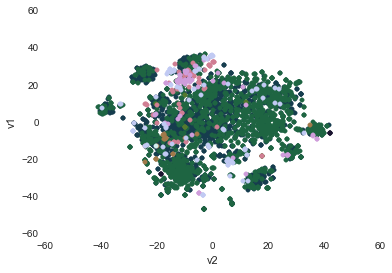

In [392]:
from tsne import bh_sne
X_2d = bh_sne(data_train_scaled[data_train_scaled_clusts==4])

df = pd.DataFrame(X_2d,columns=['v1','v2'])
df['target']= 0
cmap = sn.color_palette("cubehelix", 9)
c = []
for i,tar in enumerate(df_train[data_train_scaled_clusts==4]['target']):
    n = re.search('[0-9]',tar)
    df['target'][i] = int(n.group())
    c.append(cmap[int(n.group())-1])
df['cmap'] = c
for i in xrange(9):
    if i == 0:
        ax= df[df['target']==i+1].plot(kind='scatter',x='v2',y='v1',color=cmap[i])
    else:
        ax = df[df['target']==i+1].plot(kind='scatter',x='v2',y='v1',color=cmap[i],ax=ax)

In [403]:
clf = SVC(C=1,kernel='rbf',gamma=.001)
data_train,data_test,targ_train,targ_test = sklearn.cross_validation.train_test_split(X_2d,df_train[data_train_scaled_clusts==4]['target'])
clf.fit(data_train,targ_train)
score = clf.score(data_test,targ_test)
print score
#score = cross_val_score(clf,X_2d,df_train[data_train_scaled_clusts==4]['target'])
#print score
#clf.fit(df_train_pca4,df_train[data_train_scaled_clusts==4]['target'])

0.608200455581


In [405]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline


In [421]:
df_train_f = df_train
df_train_f[feats] = df_train[feats].astype(float)
df_test_f = df_test
df_test_f[feats] = df_test[feats].astype(float)

In [418]:
df_train_f['feat_1'] = df_train['feat_1']/100.
df_train_f.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [420]:
df_train_f['feat_2']

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    1
11    1
12    0
13    0
14    0
...
61863    0
61864    0
61865    0
61866    0
61867    0
61868    0
61869    0
61870    0
61871    0
61872    0
61873    0
61874    0
61875    0
61876    0
61877    0
Name: feat_2, Length: 61878, dtype: float64

In [422]:

mapper = DataFrameMapper([(feats,sklearn.preprocessing.MinMaxScaler())])
data_train_minmax = mapper.fit_transform(df_train_f)
data_test_minmax = mapper.transform(df_test)

In [428]:
rfc = ensemble.RandomForestClassifier()
rbm = BernoulliRBM(random_state=0, verbose=True)
data_train,data_test,targ_train,targ_test = sklearn.cross_validation.train_test_split(df_train_f[feats],df_train_f['target'])

classifier = Pipeline(steps=[('rbm', rbm), ('forest', rfc)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
#rbm.learning_rate = 0.06
# More components tend to give better prediction performance, but larger
rbm.n_iter = 20
# fitting time
rbm.n_components = 100
#logistic.C = 6000.0

# Training RBM-Logistic Pipeline
classifier.fit(data_train, targ_train)
score = classifier.score(data_test,targ_test)
print score

[BernoulliRBM] Iteration 1, pseudo-likelihood = -185003.68, time = 1.38s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -369079.37, time = 1.48s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -553119.01, time = 1.60s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -737158.85, time = 1.60s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -921195.96, time = 1.57s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1105207.81, time = 1.82s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1289217.94, time = 1.97s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1473229.96, time = 1.71s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1657237.00, time = 2.04s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1841239.11, time = 1.78s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -2025216.95, time = 1.59s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -2209236.26, time = 1.64s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -2393224.24, time = 1.63s
[BernoulliRBM] Iteration 14, pseudo-lik

# 4/26/2015

I was wondering what the numbers for each feature mean.  Currently, I am assuming that number says something about the feature (which it probably does) but what does it mean to be a 6 of a feature versus a 5.  If they are sub-categories there is less reason to convolve them.

I want to try to split them so we have >> 93 categories

In [4]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
feats = [key for key in df_train.keys() if re.match('.*feat.*',key)]
df_train = df_train[feats].astype(float)
df_test = df_test[feats].astype(float)
mapper = DataFrameMapper([(feats,sklearn.preprocessing.StandardScaler())])
data_train_scaled = mapper.fit_transform(df_train)
data_test_scaled = mapper.transform(df_test)
data_test = df_test[feats]
data_train =df_train[feats]

In [12]:
from tsne import bh_sne
X_2d = bh_sne(data_train_scaled)

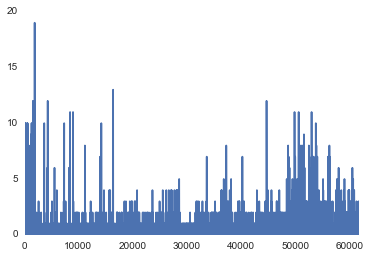

In [11]:
df = pd.DataFrame(X_2d,columns=['v1','v2'])
df['target']= 0
cmap = sn.color_palette("cubehelix", 9)
c = []
for i,tar in enumerate(df_train[data_train_scaled_clusts==4]['target']):
    n = re.search('[0-9]',tar)
    df['target'][i] = int(n.group())
    c.append(cmap[int(n.group())-1])
df['cmap'] = c
for i in xrange(9):
    if i == 0:
        ax= df[df['target']==i+1].plot(kind='scatter',x='v2',y='v1',color=cmap[i])
    else:
        ax = df[df['target']==i+1].plot(kind='scatter',x='v2',y='v1',color=cmap[i],ax=ax)